<a href="https://colab.research.google.com/github/kritika-k20/ds_Kritika_Kumari/blob/main/notebook_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Science Assignment
### - Kritika Kumari

**Objective:**
To analyze how trading behavior (profitability, risk, volume, leverage) aligns or diverges from overall market sentiment (fear vs greed) and to identify hidden trends or signals that could influence smarter trading strategies.

We want to explore and analyze the relationship between trader behavior and market sentiment using two key datasets.

In this notebook, I will upload, explore and clean the dataset. Also, I will analyze the relationships between the variables.

Importing the required libraries:

In [1]:
#Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Uploading the dataset locally:

In [2]:
#Upload dataset

from google.colab import files

uploaded_1 = files.upload()
uploaded_2 = files.upload()

Saving fear_greed_index.csv to fear_greed_index.csv


Saving historical_data.csv to historical_data.csv


In [3]:
#Reading the data into dataframa

#Fear and Greed Index
df_fear_greed = pd.read_csv("fear_greed_index.csv")
df_fear_greed.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [4]:
#Reading the data into dataframa

#Historical Trader Data
df_historical_data = pd.read_csv("historical_data.csv")
df_historical_data.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


Exploring the dataset:

In [5]:
#Data types

print("The data types of Fear & Greed Index dataset:")
print(df_fear_greed.dtypes)

print("The data types of Historical Trader dataset:")
print(df_historical_data.dtypes)

The data types of Fear & Greed Index dataset:
timestamp          int64
value              int64
classification    object
date              object
dtype: object
The data types of Historical Trader dataset:
Account              object
Coin                 object
Execution Price     float64
Size Tokens         float64
Size USD            float64
Side                 object
Timestamp IST        object
Start Position      float64
Direction            object
Closed PnL          float64
Transaction Hash     object
Order ID              int64
Crossed                bool
Fee                 float64
Trade ID            float64
Timestamp           float64
dtype: object


In [6]:
#Converting dates and times

df_fear_greed['date'] = pd.to_datetime(df_fear_greed['date'])
df_historical_data['Timestamp IST'] = pd.to_datetime(df_historical_data['Timestamp IST'], format="%d-%m-%Y %H:%M")

In [7]:
#Extracting date from timestamp

df_historical_data['date'] = df_historical_data['Timestamp IST'].dt.date
df_historical_data['date'] = pd.to_datetime(df_historical_data['date'])

df_historical_data.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02


In [8]:
#Dataset Information

print("The data information of Fear & Greed Index dataset:")
print(df_fear_greed.info())

print("The data information of Historical Trader dataset:")
print(df_historical_data.info())

The data information of Fear & Greed Index dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   timestamp       2644 non-null   int64         
 1   value           2644 non-null   int64         
 2   classification  2644 non-null   object        
 3   date            2644 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 82.8+ KB
None
The data information of Historical Trader dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Account           211224 non-null  object        
 1   Coin              211224 non-null  object        
 2   Execution Price   211224 non-null  float64       
 3   Size Tokens  

In [9]:
#Column descriptive statistics

#Fear & Greed Index
df_fear_greed.describe(include='all')

,timestamp,value,classification,date
count,2.644000e+03,2644.000000,2644,2644
unique,NaN,NaN,5,NaN
top,NaN,NaN,Fear,NaN
freq,NaN,NaN,781,NaN
mean,1.631899e+09,46.981089,NaN,2021-09-17 11:44:45.022692864
min,1.517463e+09,5.000000,NaN,2018-02-01 00:00:00
25%,1.574811e+09,28.000000,NaN,2019-11-26 18:00:00
50%,1.631900e+09,46.000000,NaN,2021-09-17 12:00:00
75%,1.688989e+09,66.000000,NaN,2023-07-10 06:00:00
max,1.746164e+09,95.000000,NaN,2025-05-02 00:00:00


In [10]:
#Historical Trader Data
df_historical_data.describe(include='all')

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date
count,211224,211224,211224.000000,2.112240e+05,2.112240e+05,211224,211224,2.112240e+05,211224,211224.000000,211224,2.112240e+05,211224,211224.000000,2.112240e+05,2.112240e+05,211224
unique,32,246,NaN,NaN,NaN,2,NaN,NaN,12,NaN,101184,NaN,2,NaN,NaN,NaN,NaN
top,0xbee1707d6b44d4d52bfe19e41f8a828645437aab,HYPE,NaN,NaN,NaN,SELL,NaN,NaN,Open Long,NaN,0x00000000000000000000000000000000000000000000...,NaN,True,NaN,NaN,NaN,NaN
freq,40184,68005,NaN,NaN,NaN,108528,NaN,NaN,49895,NaN,9032,NaN,128403,NaN,NaN,NaN,NaN
mean,NaN,NaN,11414.723350,4.623365e+03,5.639451e+03,NaN,2025-01-31 12:04:22.915009792,-2.994625e+04,NaN,48.749001,NaN,6.965388e+10,NaN,1.163967,5.628549e+14,1.737744e+12,2025-01-30 23:54:28.674013952
min,NaN,NaN,0.000005,8.740000e-07,0.000000e+00,NaN,2023-05-01 01:06:00,-1.433463e+07,NaN,-117990.104100,NaN,1.732711e+08,NaN,-1.175712,0.000000e+00,1.680000e+12,2023-05-01 00:00:00
25%,NaN,NaN,4.854700,2.940000e+00,1.937900e+02,NaN,2024-12-31 21:00:45,-3.762311e+02,NaN,0.000000,NaN,5.983853e+10,NaN,0.016121,2.810000e+14,1.740000e+12,2024-12-31 00:00:00
50%,NaN,NaN,18.280000,3.200000e+01,5.970450e+02,NaN,2025-02-24 18:55:00,8.472793e+01,NaN,0.000000,NaN,7.442939e+10,NaN,0.089578,5.620000e+14,1.740000e+12,2025-02-24 00:00:00
75%,NaN,NaN,101.580000,1.879025e+02,2.058960e+03,NaN,2025-04-02 18:22:00,9.337278e+03,NaN,5.792797,NaN,8.335543e+10,NaN,0.393811,8.460000e+14,1.740000e+12,2025-04-02 00:00:00
max,NaN,NaN,109004.000000,1.582244e+07,3.921431e+06,NaN,2025-05-01 12:13:00,3.050948e+07,NaN,135329.090100,NaN,9.014923e+10,NaN,837.471593,1.130000e+15,1.750000e+12,2025-05-01 00:00:00


Data Wrangling:

In [11]:
#Grouping Historical Data

df_historical_grouped = df_historical_data.groupby('date').agg({
    'Account': 'nunique',
    'Coin': 'nunique',
    'Execution Price': 'mean',
    'Size Tokens': 'sum',
    'Size USD': 'sum',
    'Side': lambda x: x.value_counts().to_dict(),
    'Start Position': 'mean',
    'Direction': lambda x: x.value_counts().to_dict(),
    'Closed PnL': ['mean','sum'],
    'Transaction Hash': 'count',
    'Order ID': 'nunique',
    'Crossed': 'sum',
    'Fee': 'sum',
    'Trade ID': 'nunique'}).reset_index()

df_historical_grouped.head()

date Account    Coin Execution Price  Size Tokens   Size USD  \
             nunique nunique            mean          sum        sum   
0 2023-05-01       1       1     1898.133333      0.25130     477.00   
1 2023-12-05       1       2    11038.300000     11.80901   50005.83   
2 2023-12-14       1       4     8031.868818   4092.28901  113203.35   
3 2023-12-15       1       1        2.982000   3558.00000   10609.95   
4 2023-12-16       1       1        0.384707  39897.00000   15348.77   

                    Side Start Position  \
                <lambda>           mean   
0             {'BUY': 3}       0.091933   
1  {'BUY': 7, 'SELL': 2}       2.513867   
2  {'SELL': 6, 'BUY': 5}    -132.574302   
3             {'BUY': 2}   -2440.000000   
4             {'BUY': 3}   12124.666667   

                                           Direction Closed PnL              \
                                            <lambda>       mean         sum   
0                                   {'Open Long': 3}   0.000000    0.000000   
1                  {'Open Long': 7, 'Open Short': 2}   0.000000    0.000000   
2  {'Close Long': 4, 'Open Long': 3, 'Close Short... -18.675885 -205.434737   
3                                 {'Close Short': 2} -12.316017  -24.632034   
4                                   {'Open Long': 3}   0.000000    0.000000   

  Transaction Hash Order ID Crossed        Fee Trade ID  
             count  nunique     sum        sum  nunique  
0                3        1       3   0.000000        1  
1                9        2       9  12.501455        9  
2               11        5      11  28.300831       11  
3                2        1       2   2.652489        2  
4                3        1       3   3.837189        3

In [12]:
df_historical_grouped.columns = ['_'.join(col).strip('_') if isinstance(col, tuple) else col
                        for col in df_historical_grouped.columns]

df_historical_grouped.head()

,date,Account_nunique,Coin_nunique,Execution Price_mean,Size Tokens_sum,Size USD_sum,Side_<lambda>,Start Position_mean,Direction_<lambda>,Closed PnL_mean,Closed PnL_sum,Transaction Hash_count,Order ID_nunique,Crossed_sum,Fee_sum,Trade ID_nunique
0,2023-05-01,1,1,1898.133333,0.25130,477.00,{'BUY': 3},0.091933,{'Open Long': 3},0.000000,0.000000,3,1,3,0.000000,1
1,2023-12-05,1,2,11038.300000,11.80901,50005.83,"{'BUY': 7, 'SELL': 2}",2.513867,"{'Open Long': 7, 'Open Short': 2}",0.000000,0.000000,9,2,9,12.501455,9
2,2023-12-14,1,4,8031.868818,4092.28901,113203.35,"{'SELL': 6, 'BUY': 5}",-132.574302,"{'Close Long': 4, 'Open Long': 3, 'Close Short...",-18.675885,-205.434737,11,5,11,28.300831,11
3,2023-12-15,1,1,2.982000,3558.00000,10609.95,{'BUY': 2},-2440.000000,{'Close Short': 2},-12.316017,-24.632034,2,1,2,2.652489,2
4,2023-12-16,1,1,0.384707,39897.00000,15348.77,{'BUY': 3},12124.666667,{'Open Long': 3},0.000000,0.000000,3,1,3,3.837189,3


In [13]:
#Merging the two datasets

merged_df = pd.merge(df_historical_grouped, df_fear_greed, on='date', how='inner')
merged_df.head()

,date,Account_nunique,Coin_nunique,Execution Price_mean,Size Tokens_sum,Size USD_sum,Side_<lambda>,Start Position_mean,Direction_<lambda>,Closed PnL_mean,Closed PnL_sum,Transaction Hash_count,Order ID_nunique,Crossed_sum,Fee_sum,Trade ID_nunique,timestamp,value,classification
0,2023-05-01,1,1,1898.133333,0.25130,477.00,{'BUY': 3},0.091933,{'Open Long': 3},0.000000,0.000000,3,1,3,0.000000,1,1682919000,63,Greed
1,2023-12-05,1,2,11038.300000,11.80901,50005.83,"{'BUY': 7, 'SELL': 2}",2.513867,"{'Open Long': 7, 'Open Short': 2}",0.000000,0.000000,9,2,9,12.501455,9,1701754200,75,Extreme Greed
2,2023-12-14,1,4,8031.868818,4092.28901,113203.35,"{'SELL': 6, 'BUY': 5}",-132.574302,"{'Close Long': 4, 'Open Long': 3, 'Close Short...",-18.675885,-205.434737,11,5,11,28.300831,11,1702531800,72,Greed
3,2023-12-15,1,1,2.982000,3558.00000,10609.95,{'BUY': 2},-2440.000000,{'Close Short': 2},-12.316017,-24.632034,2,1,2,2.652489,2,1702618200,70,Greed
4,2023-12-16,1,1,0.384707,39897.00000,15348.77,{'BUY': 3},12124.666667,{'Open Long': 3},0.000000,0.000000,3,1,3,3.837189,3,1702704600,67,Greed


In [14]:
#Downloading the merged datasets

merged_df.to_csv('merged_data.csv', index=False)
files.download('merged_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [15]:
#Identifying the duplicated rows

# Exclude columns with dictionary values
cols_to_check = merged_df.columns.difference(['Side_<lambda>', 'Direction_<lambda>'])

duplicated_data = merged_df[merged_df.duplicated(subset=cols_to_check, keep=False)]
print("No. of Duplicated Rows:", merged_df.duplicated(subset=cols_to_check).sum())
duplicated_data.sort_values(by='date', ascending=True, inplace=True)
duplicated_data.head()

No. of Duplicated Rows: 0


/tmp/ipython-input-1187771006.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duplicated_data.sort_values(by='date', ascending=True, inplace=True)


,date,Account_nunique,Coin_nunique,Execution Price_mean,Size Tokens_sum,Size USD_sum,Side_<lambda>,Start Position_mean,Direction_<lambda>,Closed PnL_mean,Closed PnL_sum,Transaction Hash_count,Order ID_nunique,Crossed_sum,Fee_sum,Trade ID_nunique,timestamp,value,classification


There's no duplicated rows.

In [16]:
#Missing rows

null_data = merged_df.isnull()
for column in null_data.columns.values.tolist():
    print(column)
    print (null_data[column].value_counts())
    print("")

date
date
False    479
Name: count, dtype: int64

Account_nunique
Account_nunique
False    479
Name: count, dtype: int64

Coin_nunique
Coin_nunique
False    479
Name: count, dtype: int64

Execution Price_mean
Execution Price_mean
False    479
Name: count, dtype: int64

Size Tokens_sum
Size Tokens_sum
False    479
Name: count, dtype: int64

Size USD_sum
Size USD_sum
False    479
Name: count, dtype: int64

Side_<lambda>
Side_<lambda>
False    479
Name: count, dtype: int64

Start Position_mean
Start Position_mean
False    479
Name: count, dtype: int64

Direction_<lambda>
Direction_<lambda>
False    479
Name: count, dtype: int64

Closed PnL_mean
Closed PnL_mean
False    479
Name: count, dtype: int64

Closed PnL_sum
Closed PnL_sum
False    479
Name: count, dtype: int64

Transaction Hash_count
Transaction Hash_count
False    479
Name: count, dtype: int64

Order ID_nunique
Order ID_nunique
False    479
Name: count, dtype: int64

Crossed_sum
Crossed_sum
False    479
Name: count, dtype: int64



There's no missing values.

Exploratory Data Analysis:

In [17]:
 #Correlation between the variables

numeric_columns = merged_df.select_dtypes(include=[np.number])
correlation_matrix = numeric_columns.corr()
correlation_matrix

,Account_nunique,Coin_nunique,Execution Price_mean,Size Tokens_sum,Size USD_sum,Start Position_mean,Closed PnL_mean,Closed PnL_sum,Transaction Hash_count,Order ID_nunique,Crossed_sum,Fee_sum,Trade ID_nunique,timestamp,value
Account_nunique,1.000000,0.755519,0.025111,0.209784,0.640824,-0.143603,0.051796,0.440197,0.797223,0.728996,0.813669,0.645403,0.913554,0.796513,-0.277510
Coin_nunique,0.755519,1.000000,-0.029215,0.203733,0.397606,-0.118901,0.044273,0.327553,0.574828,0.682340,0.600708,0.412723,0.713229,0.636067,-0.020821
Execution Price_mean,0.025111,-0.029215,1.000000,-0.037220,0.206365,-0.076041,0.003538,-0.024298,-0.008288,-0.042727,0.007807,0.208337,-0.000045,0.258643,-0.060238
Size Tokens_sum,0.209784,0.203733,-0.037220,1.000000,0.223940,-0.131481,0.013435,-0.050904,0.356094,0.438954,0.298575,0.219074,0.318198,0.102910,0.039202
Size USD_sum,0.640824,0.397606,0.206365,0.223940,1.000000,-0.148356,0.013028,0.325759,0.720137,0.494993,0.759352,0.978430,0.706165,0.480843,-0.264371
Start Position_mean,-0.143603,-0.118901,-0.076041,-0.131481,-0.148356,1.000000,-0.013412,0.072768,-0.172092,-0.241603,-0.162151,-0.160055,-0.142204,-0.050093,-0.099755
Closed PnL_mean,0.051796,0.044273,0.003538,0.013435,0.013028,-0.013412,1.000000,0.376053,0.011899,0.017177,0.001005,0.004889,0.030630,0.090388,0.037315
Closed PnL_sum,0.440197,0.327553,-0.024298,-0.050904,0.325759,0.072768,0.376053,1.000000,0.360552,0.271157,0.358410,0.294822,0.456450,0.306597,-0.082642
Transaction Hash_count,0.797223,0.574828,-0.008288,0.356094,0.720137,-0.172092,0.011899,0.360552,1.000000,0.829907,0.928052,0.715468,0.922608,0.582558,-0.245241
Order ID_nunique,0.728996,0.682340,-0.042727,0.438954,0.494993,-0.241603,0.017177,0.271157,0.829907,1.000000,0.759518,0.509293,0.815139,0.550101,0.006460


In [18]:
#Correlation between relevant columns

new_df = merged_df[['Execution Price_mean', 'Size Tokens_sum', 'Size USD_sum',
                    'Start Position_mean',	'Closed PnL_mean',	'Closed PnL_sum',
                    'Crossed_sum',	'Fee_sum']]
new_df.corr()

,Execution Price_mean,Size Tokens_sum,Size USD_sum,Start Position_mean,Closed PnL_mean,Closed PnL_sum,Crossed_sum,Fee_sum
Execution Price_mean,1.000000,-0.037220,0.206365,-0.076041,0.003538,-0.024298,0.007807,0.208337
Size Tokens_sum,-0.037220,1.000000,0.223940,-0.131481,0.013435,-0.050904,0.298575,0.219074
Size USD_sum,0.206365,0.223940,1.000000,-0.148356,0.013028,0.325759,0.759352,0.978430
Start Position_mean,-0.076041,-0.131481,-0.148356,1.000000,-0.013412,0.072768,-0.162151,-0.160055
Closed PnL_mean,0.003538,0.013435,0.013028,-0.013412,1.000000,0.376053,0.001005,0.004889
Closed PnL_sum,-0.024298,-0.050904,0.325759,0.072768,0.376053,1.000000,0.358410,0.294822
Crossed_sum,0.007807,0.298575,0.759352,-0.162151,0.001005,0.358410,1.000000,0.768174
Fee_sum,0.208337,0.219074,0.978430,-0.160055,0.004889,0.294822,0.768174,1.000000


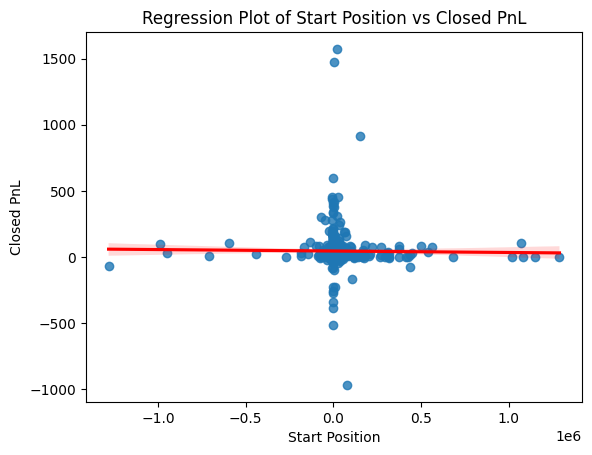

In [19]:
#Scatterplot of Start Position and Closed PnL

sns.regplot(data=merged_df, x='Start Position_mean', y='Closed PnL_mean', line_kws={"color": "red"})
plt.title('Regression Plot of Start Position vs Closed PnL')
plt.xlabel('Start Position')
plt.ylabel('Closed PnL')
plt.show()

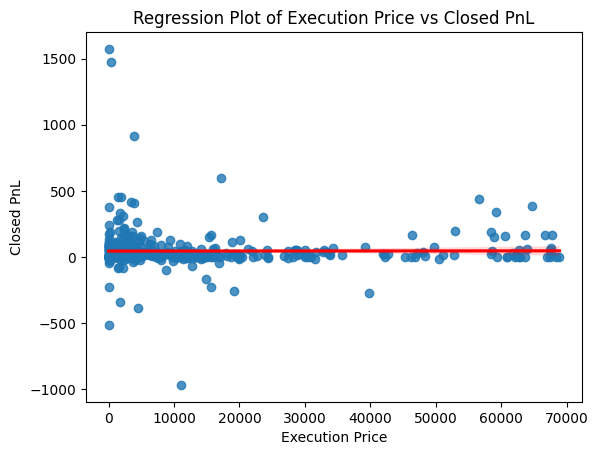

In [20]:
#Scatterplot of Closed PnL and Execution Price

sns.regplot(data=merged_df, x='Execution Price_mean', y='Closed PnL_mean', line_kws={"color": "red"})
plt.title('Regression Plot of Execution Price vs Closed PnL')
plt.xlabel('Execution Price')
plt.ylabel('Closed PnL')
plt.show()

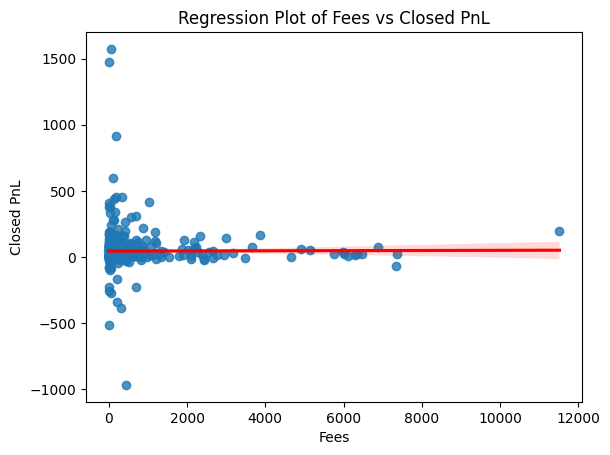

In [21]:
#Scatterplot of Closed PnL and Fees

sns.regplot(data=merged_df, x='Fee_sum', y='Closed PnL_mean', line_kws={"color": "red"})
plt.title('Regression Plot of Fees vs Closed PnL')
plt.xlabel('Fees')
plt.ylabel('Closed PnL')
plt.show()

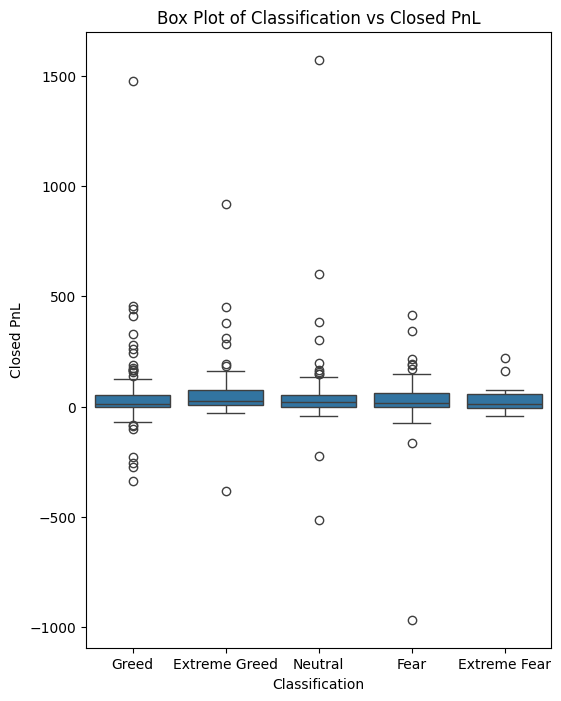

In [23]:
#Box Plot of Classification and Profitability

plt.figure(figsize=(6, 8))
sns.boxplot(data=merged_df, x='classification', y='Closed PnL_mean')
plt.title('Box Plot of Classification vs Closed PnL')
plt.xlabel('Classification')
plt.ylabel('Closed PnL')
plt.show()

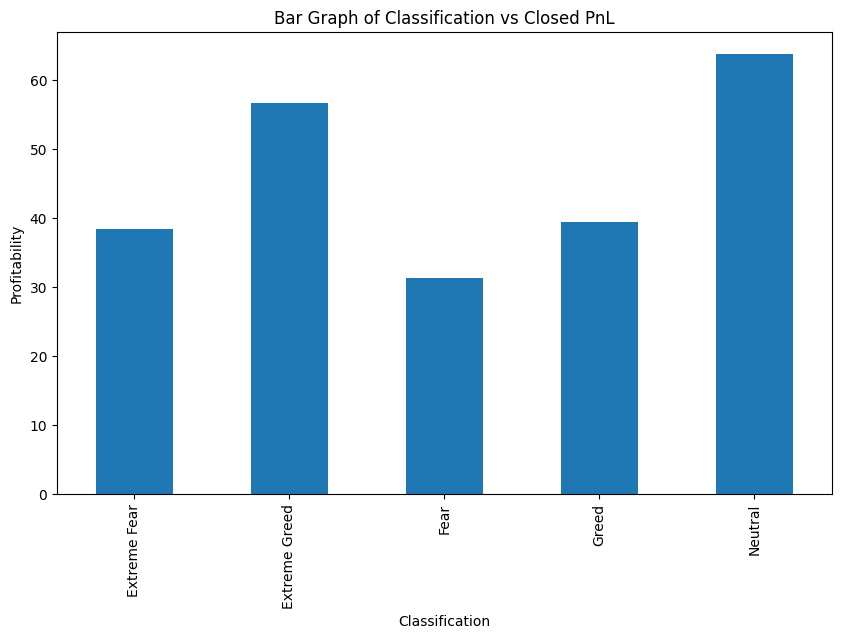

In [24]:
#Bar Plot of Classification and Profitability

classification_profitability = merged_df.groupby('classification')['Closed PnL_mean'].mean()
plt.figure(figsize=(10, 6))
classification_profitability.plot(kind='bar')
plt.title('Bar Graph of Classification vs Closed PnL')
plt.xlabel('Classification')
plt.ylabel('Profitability')
plt.show()

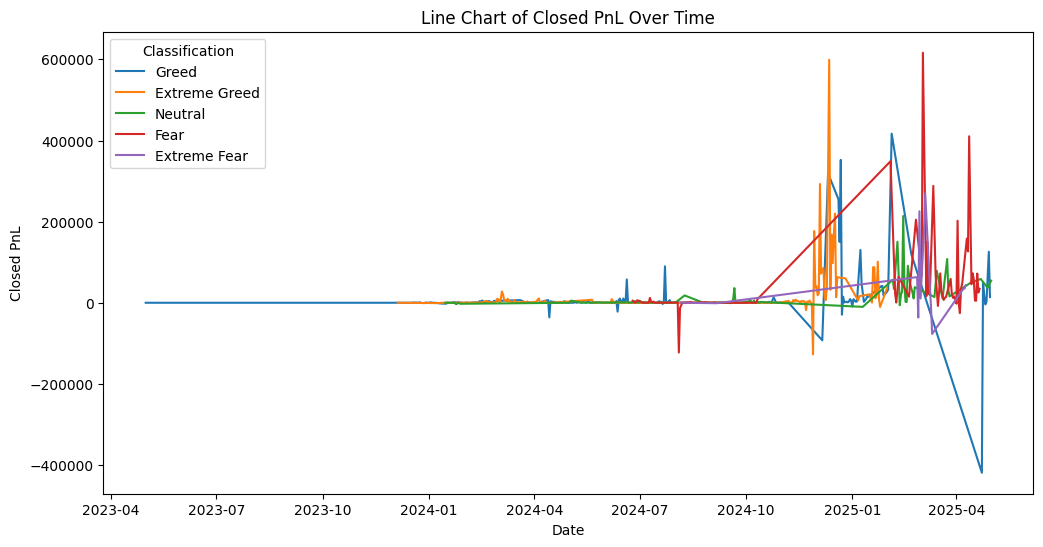

In [25]:
#Line Chart of Profitability and Classification

plt.figure(figsize=(12, 6))
sns.lineplot(x="date", y="Closed PnL_sum", hue="classification", data=merged_df)
plt.title("Line Chart of Closed PnL Over Time")
plt.xlabel("Date")
plt.ylabel("Closed PnL")
plt.legend(title="Classification")
plt.show()

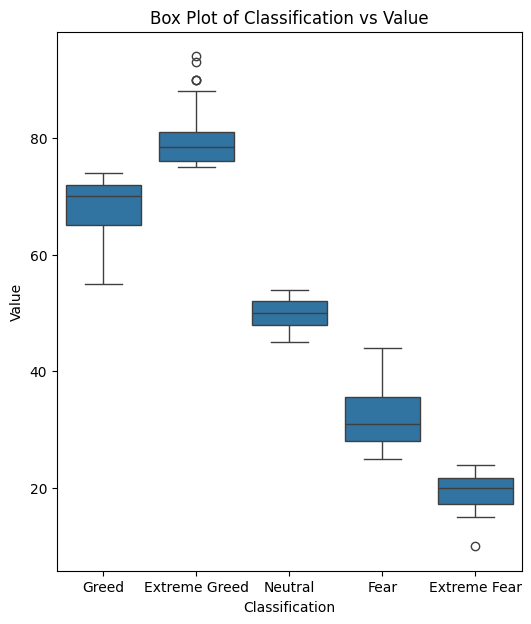

In [26]:
#Box Plot of Classification and Value

plt.figure(figsize=(6, 7))
sns.boxplot(data=merged_df, x='classification', y='value')
plt.title('Box Plot of Classification vs Value')
plt.xlabel('Classification')
plt.ylabel('Value')
plt.show()

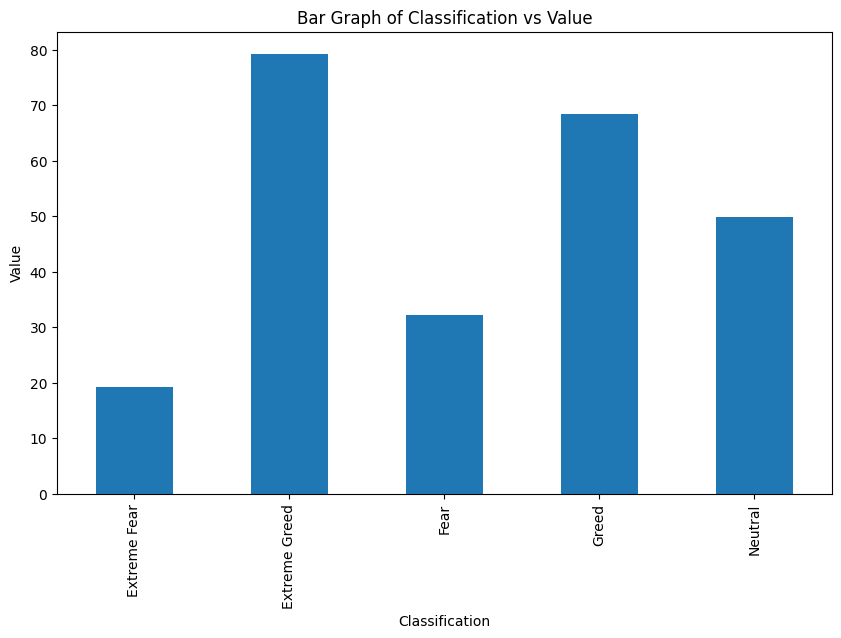

In [28]:
#Bar chart of Classification and Value

classification_value = merged_df.groupby('classification')['value'].mean()
plt.figure(figsize=(10, 6))
classification_value.plot(kind='bar')
plt.title('Bar Graph of Classification vs Value')
plt.xlabel('Classification')
plt.ylabel('Value')
plt.show()

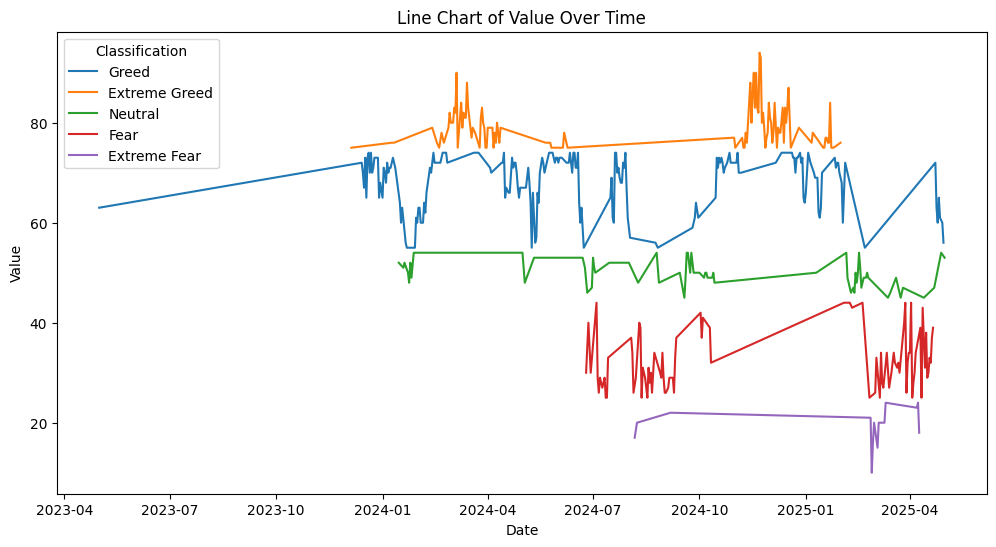

In [29]:
#Line Chart of Value and Classification

plt.figure(figsize=(12, 6))
sns.lineplot(x="date", y="value", hue="classification", data=merged_df)
plt.title("Line Chart of Value Over Time")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend(title="Classification")
plt.show()

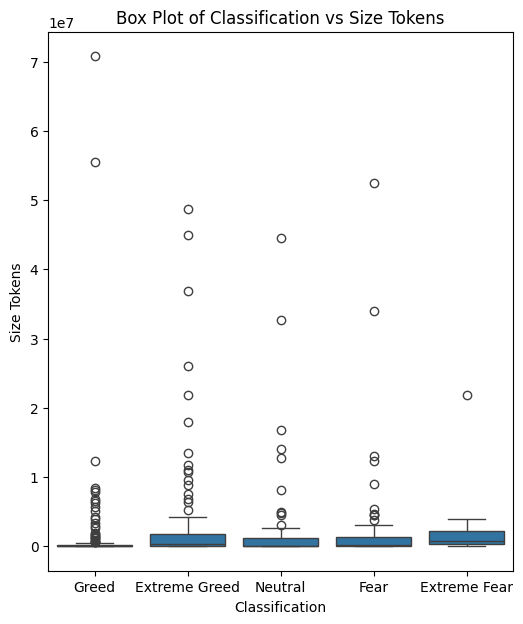

In [30]:
#Box Plot of Classification and Size Tokens

plt.figure(figsize=(6, 7))
sns.boxplot(data=merged_df, x='classification', y='Size Tokens_sum')
plt.title('Box Plot of Classification vs Size Tokens')
plt.xlabel('Classification')
plt.ylabel('Size Tokens')
plt.show()

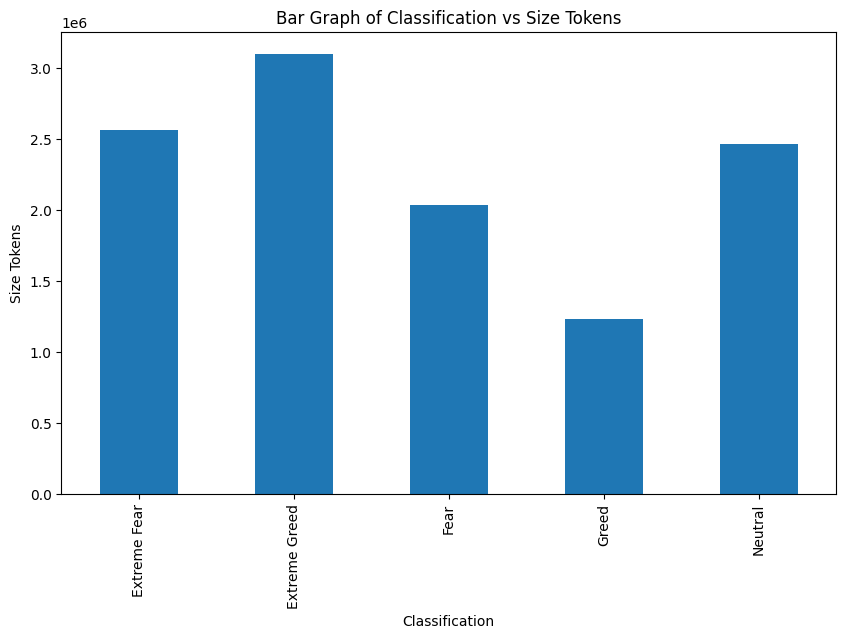

In [31]:
#Bar Graph of Classification and Size Tokens

classification_size_tokens = merged_df.groupby('classification')['Size Tokens_sum'].mean()
plt.figure(figsize=(10, 6))
classification_size_tokens.plot(kind='bar')
plt.title('Bar Graph of Classification vs Size Tokens')
plt.xlabel('Classification')
plt.ylabel('Size Tokens')
plt.show()

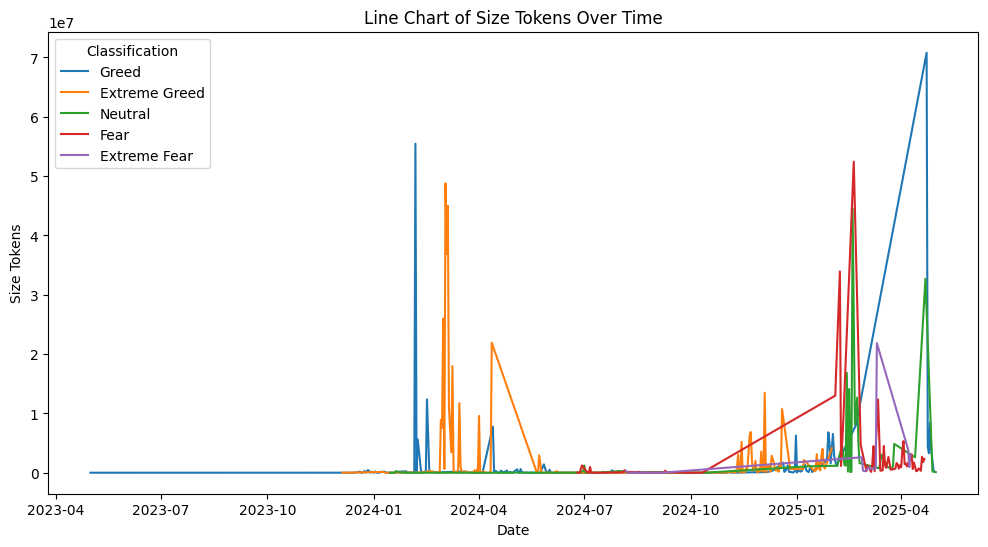

In [32]:
#Line Chart of Classification and Size Tokens

plt.figure(figsize=(12, 6))
sns.lineplot(x="date", y="Size Tokens_sum", hue="classification", data=merged_df)
plt.title("Line Chart of Size Tokens Over Time")
plt.xlabel("Date")
plt.ylabel("Size Tokens")
plt.legend(title="Classification")
plt.show()

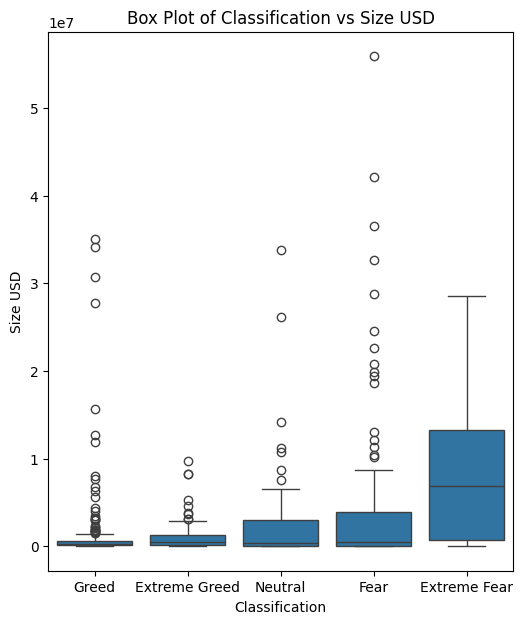

In [33]:
#Box Plot of Classification and Size USD

plt.figure(figsize=(6, 7))
sns.boxplot(data=merged_df, x='classification', y='Size USD_sum')
plt.title('Box Plot of Classification vs Size USD')
plt.xlabel('Classification')
plt.ylabel('Size USD')
plt.show()

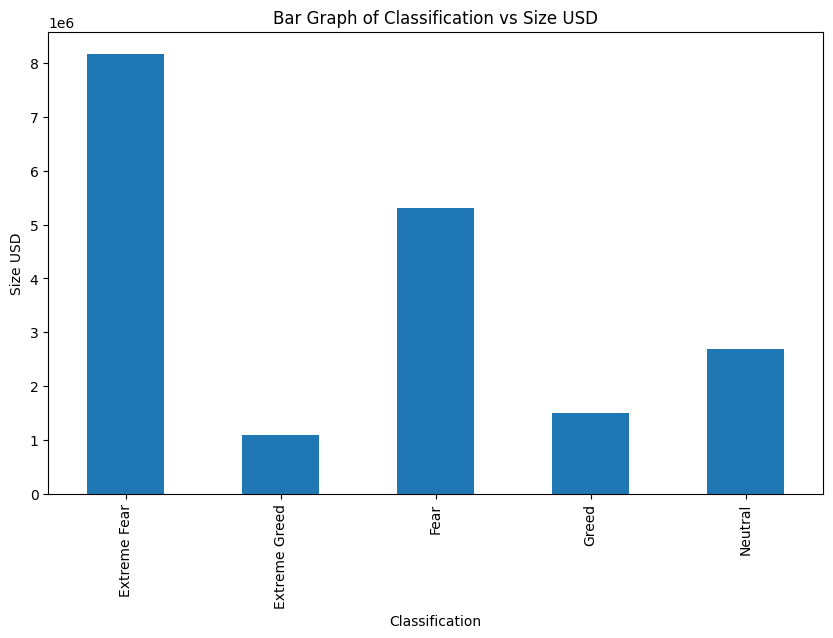

In [34]:
#Bar Graph of Classification and Size USD

classification_size_usd = merged_df.groupby('classification')['Size USD_sum'].mean()
plt.figure(figsize=(10, 6))
classification_size_usd.plot(kind='bar')
plt.title('Bar Graph of Classification vs Size USD')
plt.xlabel('Classification')
plt.ylabel('Size USD')
plt.show()

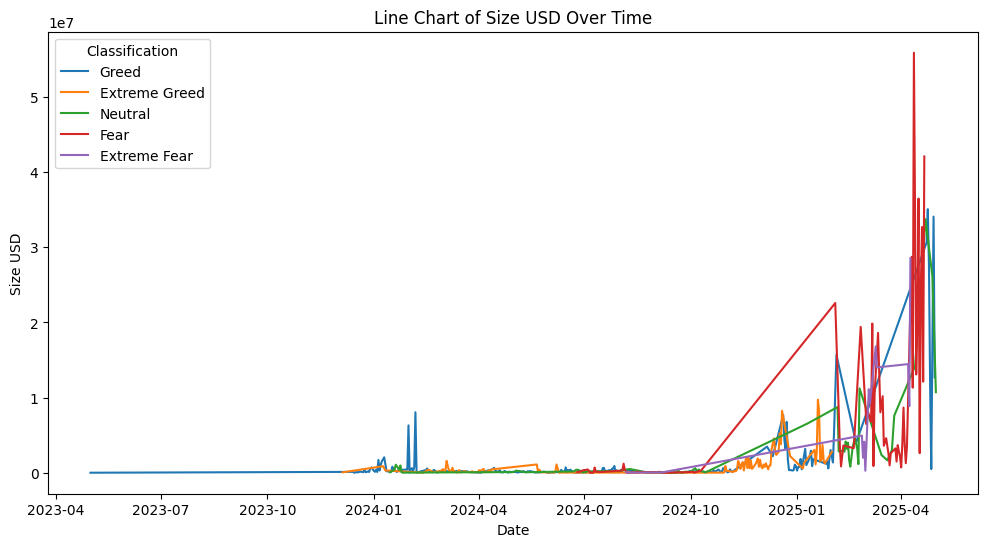

In [35]:
#Line Chart of Classification and Size USD

plt.figure(figsize=(12, 6))
sns.lineplot(x="date", y="Size USD_sum", hue="classification", data=merged_df)
plt.title("Line Chart of Size USD Over Time")
plt.xlabel("Date")
plt.ylabel("Size USD")
plt.legend(title="Classification")
plt.show()

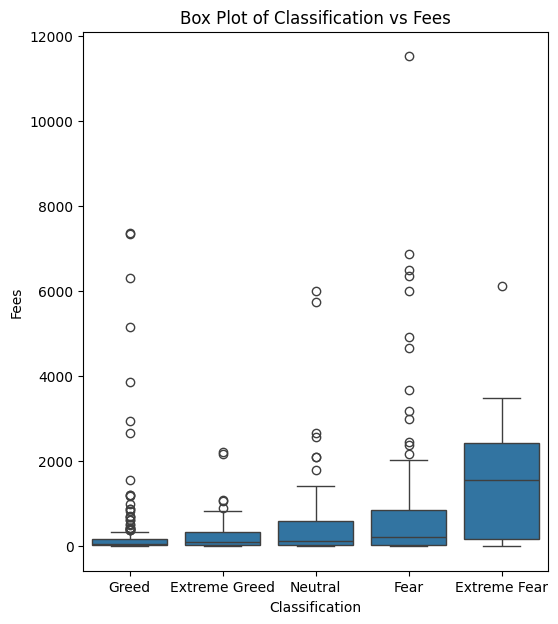

In [36]:
#Box Plot of Classification and Fees

plt.figure(figsize=(6, 7))
sns.boxplot(data=merged_df, x='classification', y='Fee_sum')
plt.title('Box Plot of Classification vs Fees')
plt.xlabel('Classification')
plt.ylabel('Fees')
plt.show()

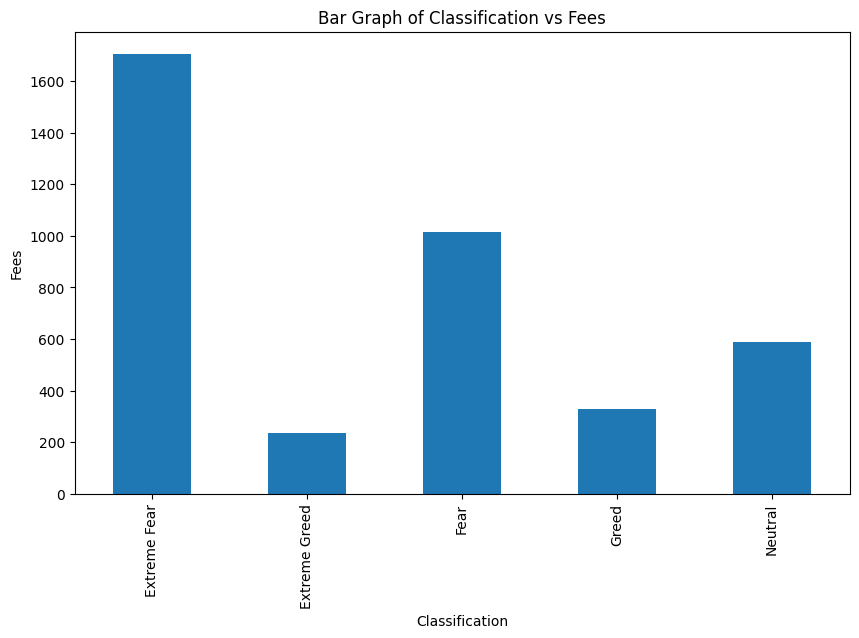

In [37]:
#Bar Chart of Classification and Fees

classification_fees = merged_df.groupby('classification')['Fee_sum'].mean()
plt.figure(figsize=(10, 6))
classification_fees.plot(kind='bar')
plt.title('Bar Graph of Classification vs Fees')
plt.xlabel('Classification')
plt.ylabel('Fees')
plt.show()

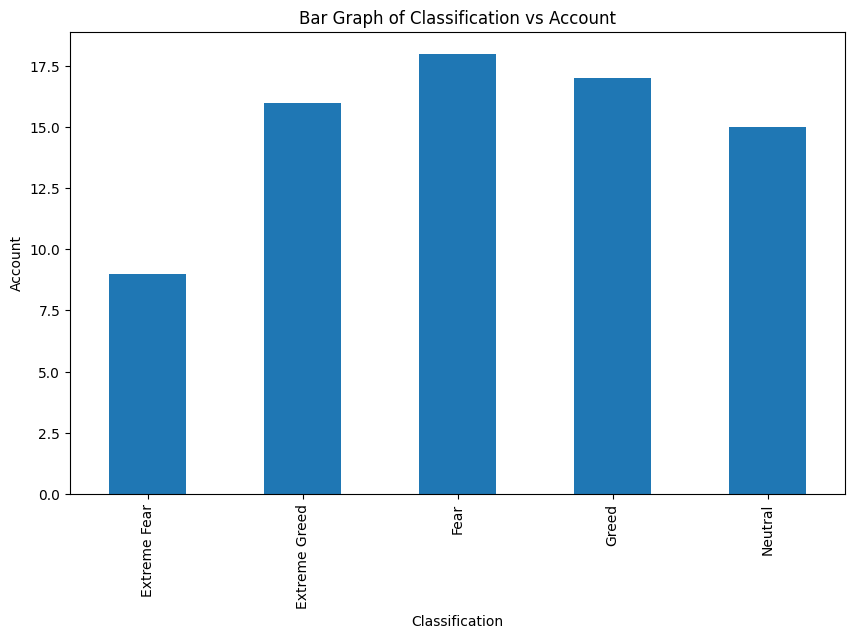

In [38]:
#Bar Chart of Classification and Account

classification_account = merged_df.groupby('classification')['Account_nunique'].nunique()
plt.figure(figsize=(10, 6))
classification_account.plot(kind='bar')
plt.title('Bar Graph of Classification vs Account')
plt.xlabel('Classification')
plt.ylabel('Account')
plt.show()